📁 Upload your NBA traditional stats CSV (2020–2025)


Saving nba_traditional_RS_2020_2025.csv to nba_traditional_RS_2020_2025.csv
✅ Saved: club_40_50_80_all_2020_25.csv
✅ Saved: club_40_50_80_top10_per_year_2020_25.csv


/tmp/ipython-input-2321163710.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: topN(g, 10))


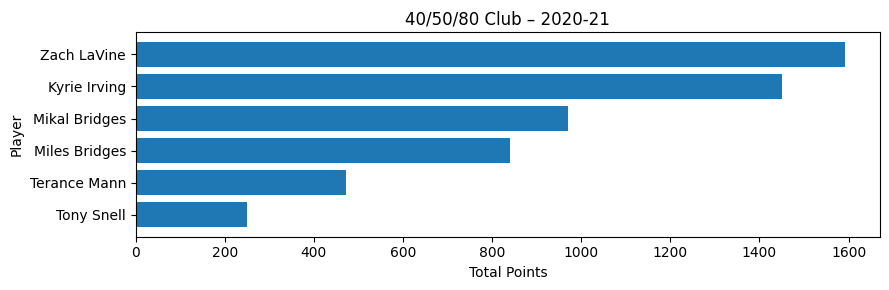

🖼️ Saved: club_40_50_80_2020-21.jpg


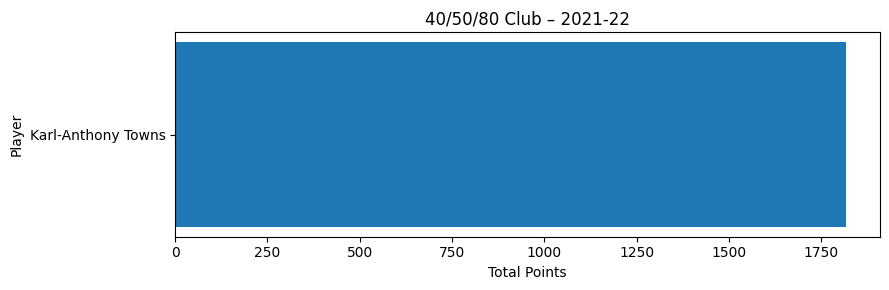

🖼️ Saved: club_40_50_80_2021-22.jpg


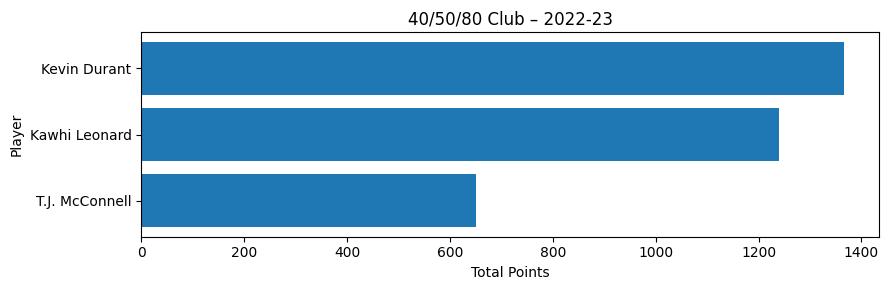

🖼️ Saved: club_40_50_80_2022-23.jpg


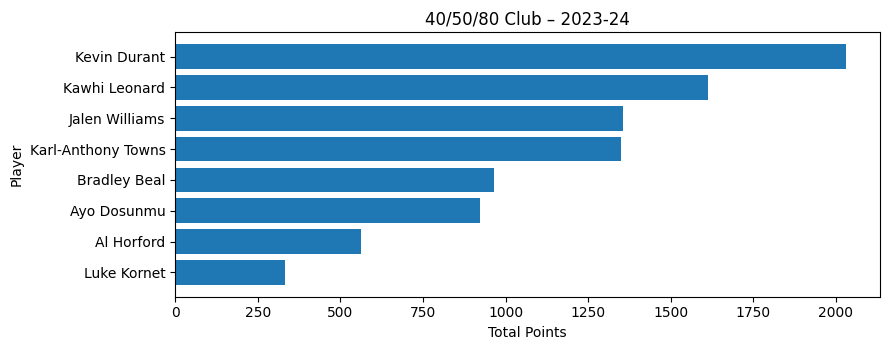

🖼️ Saved: club_40_50_80_2023-24.jpg


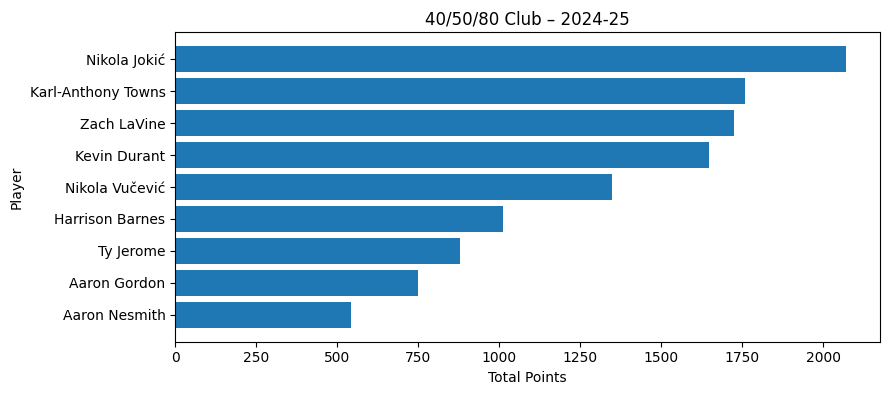

🖼️ Saved: club_40_50_80_2024-25.jpg
✅ Saved: club_40_50_80_alltime_top15_2020_25.csv


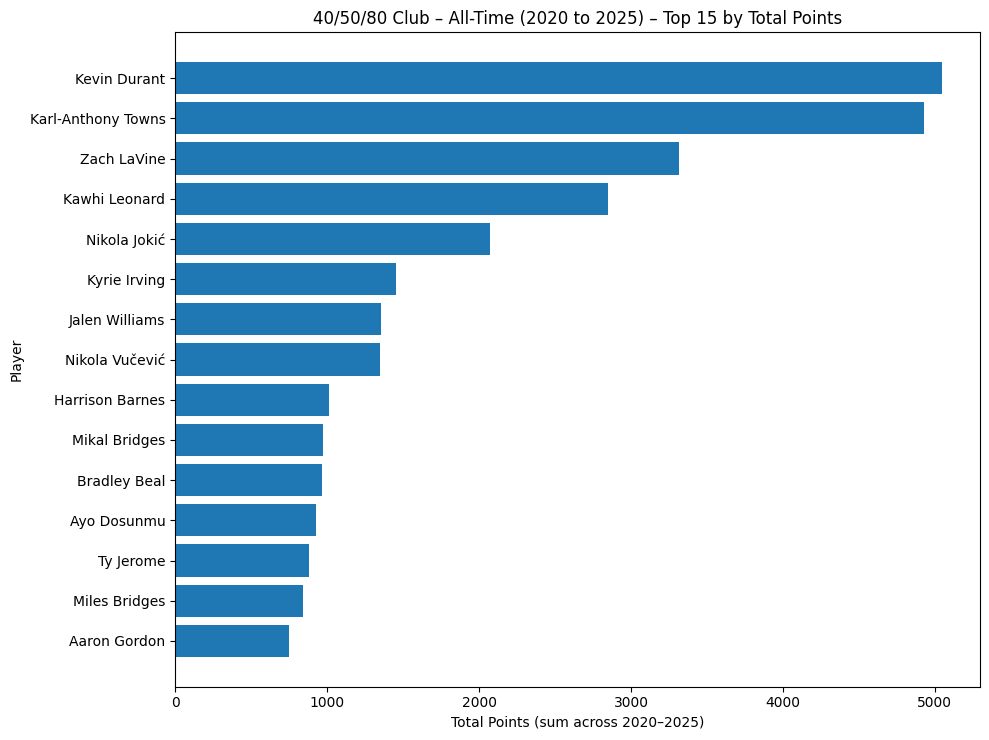

🖼️ Saved: club_40_50_80_alltime_top15_2020_25.jpg

📋 Sample rows:
      Year              PLAYER TEAM  GP   MIN        MPG  FG_PCT  FG3_PCT  \
0  2020-21         Zach LaVine  CHI  58  2034  35.068966   0.507    0.419   
1  2020-21        Kyrie Irving  BKN  54  1886  34.925926   0.506    0.402   
2  2020-21       Mikal Bridges  PHX  72  2348  32.611111   0.543    0.425   
3  2020-21       Miles Bridges  CHA  66  1932  29.272727   0.503    0.400   
4  2020-21        Terance Mann  LAC  67  1263  18.850746   0.509    0.418   
5  2020-21          Tony Snell  ATL  47   992  21.106383   0.515    0.569   
6  2021-22  Karl-Anthony Towns  MIN  74  2475  33.445946   0.529    0.410   
7  2022-23        Kevin Durant  PHX  47  1672  35.574468   0.560    0.404   
8  2022-23       Kawhi Leonard  LAC  52  1748  33.615385   0.512    0.416   
9  2022-23      T.J. McConnell  IND  75  1526  20.346667   0.543    0.441   

   FT_PCT   PTS  
0   0.849  1591  
1   0.922  1451  
2   0.840   970  
3   0.867   84

In [1]:
# 📓 Statline: 40/50/80 Club – Seasons 2020 to 2025
# Requirements in CSV: Year, PLAYER, TEAM, GP, MIN, FG_PCT, FG3_PCT, FT_PCT, PTS

# 🟦 Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# 🟦 Step 2: Upload dataset
print("📁 Upload your NBA traditional stats CSV (2020–2025)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# 🟦 Step 3: Load & tidy
df = pd.read_csv(filename)
df.columns = df.columns.str.strip()

# --- Utility: normalize Year to a comparable text form for grouping/labels
# Works for "2020-21" / "2020–21" / 2021 / 2024 etc.
year_col = "Year"
df[year_col] = df[year_col].astype(str).str.replace("–", "-", regex=False).str.strip()

# Keep only seasons 2020..2025 (season strings containing these years)
wanted = ("2020","2021","2022","2023","2024","2025")
mask_year = df[year_col].str.contains("|".join(wanted))
df = df[mask_year].copy()

# 🟦 Step 4: Ensure percentages are on 0–1 scale
for col in ["FG_PCT", "FG3_PCT", "FT_PCT"]:
    if df[col].max() > 1.5:   # likely stored as 0..100
        df[col] = df[col] / 100.0

# 🟦 Step 5: Minimum sample thresholds (tweak here if you like)
MIN_GP   = 40   # at least half a season
MIN_MIN  = 800  # ~10 MPG across 80 games; protects against tiny samples

df["MPG"] = df["MIN"] / df["GP"].replace(0, np.nan)

df_qual = df[
    (df["GP"] >= MIN_GP) &
    (df["MIN"] >= MIN_MIN)
].copy()

# 🟦 Step 6: 40/50/80 filter
club = df_qual[
    (df_qual["FG3_PCT"] >= 0.40) &
    (df_qual["FG_PCT"]  >= 0.50) &
    (df_qual["FT_PCT"]  >= 0.80)
].copy()

# Safety: select clean set of columns for outputs
cols_out = [
    "Year","PLAYER","TEAM","GP","MIN","MPG",
    "FG_PCT","FG3_PCT","FT_PCT","PTS"
]
club = club[cols_out].sort_values(["Year","PTS"], ascending=[True, False]).reset_index(drop=True)

# 🟦 Step 7: Save per-year and all-time CSVs
club.to_csv("club_40_50_80_all_2020_25.csv", index=False)
print("✅ Saved: club_40_50_80_all_2020_25.csv")

# Also build a compact per-year Top list (up to top 10 by PTS each season)
def topN(g, n=10):
    return g.sort_values("PTS", ascending=False).head(n)

club_top_per_year = (
    club.groupby("Year", as_index=False, group_keys=False)
        .apply(lambda g: topN(g, 10))
        .reset_index(drop=True)
)
club_top_per_year.to_csv("club_40_50_80_top10_per_year_2020_25.csv", index=False)
print("✅ Saved: club_40_50_80_top10_per_year_2020_25.csv")

# 🟦 Step 8: Plots – per-year bars (by PTS)
years = club["Year"].unique().tolist()
years.sort()

if len(years) == 0:
    print("⚠️ No players met the 40/50/80 thresholds with the current GP/MIN minimums.")
else:
    # One figure per season
    for y in years:
        ydf = club[club["Year"] == y].sort_values("PTS", ascending=False)
        if ydf.empty:
            continue
        plt.figure(figsize=(9, max(3, 0.45 * len(ydf))))
        plt.barh(ydf["PLAYER"], ydf["PTS"])
        plt.gca().invert_yaxis()
        plt.title(f"40/50/80 Club – {y}")
        plt.xlabel("Total Points")
        plt.ylabel("Player")
        plt.tight_layout()
        fname = f"club_40_50_80_{y.replace('/', '-').replace(' ', '_')}.jpg"
        plt.savefig(fname, dpi=300)
        plt.show()
        print(f"🖼️ Saved: {fname}")

    # 🟦 Step 9: All-time (2020–2025) – aggregate by player (sum PTS, avg shooting)
    club_alltime = (
        club.groupby("PLAYER", as_index=False)
            .agg({
                "TEAM":"last",
                "GP":"sum",
                "MIN":"sum",
                "MPG":"mean",
                "PTS":"sum",
                "FG_PCT":"mean",
                "FG3_PCT":"mean",
                "FT_PCT":"mean"
            })
            .sort_values("PTS", ascending=False)
            .head(15)
    )
    club_alltime.to_csv("club_40_50_80_alltime_top15_2020_25.csv", index=False)
    print("✅ Saved: club_40_50_80_alltime_top15_2020_25.csv")

    # All-time bar chart by total points
    plt.figure(figsize=(10, max(3, 0.5 * len(club_alltime))))
    plt.barh(club_alltime["PLAYER"], club_alltime["PTS"])
    plt.gca().invert_yaxis()
    plt.title("40/50/80 Club – All-Time (2020 to 2025) – Top 15 by Total Points")
    plt.xlabel("Total Points (sum across 2020–2025)")
    plt.ylabel("Player")
    plt.tight_layout()
    plt.savefig("club_40_50_80_alltime_top15_2020_25.jpg", dpi=300)
    plt.show()
    print("🖼️ Saved: club_40_50_80_alltime_top15_2020_25.jpg")

# 🟦 Step 10 (optional): Print a quick preview
print("\n📋 Sample rows:")
print(club.head(10))